Unsupervised Learning - K mean Clustering


Unsupervised learning is like a computer trying to find patterns or groups in a big pile of data without any labels or instructions. It's like giving the computer a bunch of puzzle pieces without showing it the picture on the box. The computer's job is to figure out how these pieces might fit together or if there are any similar pieces.

So, in unsupervised learning, the computer explores the data on its own, looking for similarities or differences between the pieces (data points) and trying to organize them into groups or clusters. It's a bit like a detective trying to solve a mystery without any clues, using only the information at hand.

Unsupervised learning can be used to discover hidden patterns in data, which can be helpful in various fields like finding customer segments in marketing, organizing information on the internet, or even in science to make sense of complex datasets. It's all about letting the computer learn from the data itself and uncovering valuable insights without explicit instructions.


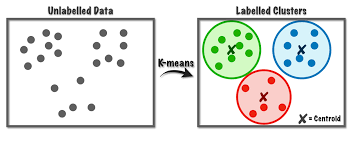

K-means clustering


K-means clustering is like sorting a pile of marbles into different groups. Imagine you have a bunch of marbles of different colors, and you want to group them based on their similarity in color. K-means helps you do this automatically.

Here's how it works:

You decide how many groups (clusters) you want to create (let's say you want 3 groups).
You randomly pick 3 marbles as initial representatives for each group.
Then, you measure the distance between each marble and the representatives and assign each marble to the group represented by the nearest marble.
You recalculate the representatives for each group by finding the average color of all the marbles in that group.
Repeat steps 3 and 4 until the groups don't change much or a certain number of times.


In [ ]:
import pandas as pd
import numpy as np


In [ ]:
import pandas as pd
import random

# Create an empty dictionary to store the data
data = {
    'Character': [],
    'Strength': [],
    'Intelligence': [],
    'CombatSkills': [],
    'TechnologyUsage': []
}


# List of Avengers characters
characters = [
    'Iron Man', 'Captain America', 'Thor', 'Black Widow', 'Hulk',
    'Hawkeye', 'Scarlet Witch', 'Vision', 'Spider-Man', 'Black Panther',
    'Doctor Strange', 'Ant-Man', 'Captain Marvel', 'Falcon', 'War Machine',
    'Wolverine', 'Deadpool', 'Hawkeye (Kate Bishop)', 'Daredevil', 'Black Bolt',
    'Luke Cage', 'Jessica Jones', 'Iron Fist', 'Punisher', 'Moon Knight',
    'She-Hulk', 'Groot', 'Rocket Raccoon', 'Gamora'
]

# Generate random data for each character
for character in characters:
    data['Character'].append(character)
    data['Strength'].append(random.randint(1, 10))
    data['Intelligence'].append(random.randint(1, 10))
    data['CombatSkills'].append(random.randint(1, 10))
    data['TechnologyUsage'].append(random.randint(1, 10))

# Create a DataFrame from the dictionary
avengers_df = pd.DataFrame(data)
avengers_df.to_csv('avengers_large_dataset.csv', index=False)


In [ ]:
df= pd.read_csv('avengers_large_dataset.csv')

In [ ]:
df.head()

,Character,Strength,Intelligence,CombatSkills,TechnologyUsage
0,Iron Man,4,4,9,2
1,Captain America,3,2,3,4
2,Thor,4,6,10,9
3,Black Widow,4,4,2,5
4,Hulk,5,2,1,4


In [ ]:
df.columns

Index(['Character', 'Strength', 'Intelligence', 'CombatSkills',
       'TechnologyUsage'],
      dtype='object')

In [ ]:
features = ["Strength", "Intelligence", "CombatSkills", "TechnologyUsage"]
X = df[features].values


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
n_clusters = 2

In [ ]:
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X_scaled)
labels = kmeans.labels_
data['Team'] = labels  # Add a 'Team' column to the dataset indicating cluster assignments


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


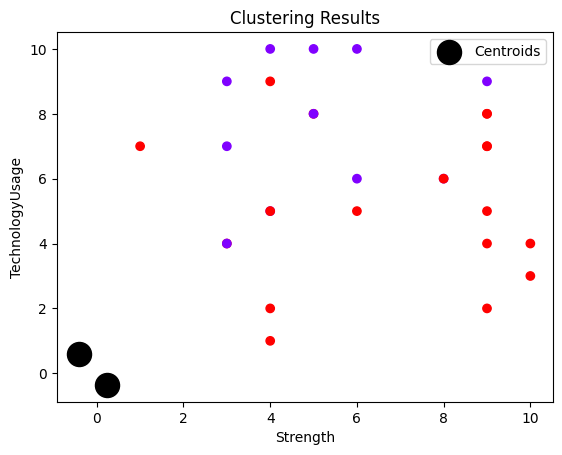

In [ ]:
# Example: Visualizing APPEARANCES vs. STRENGTH
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', label='Centroids')
plt.title('Clustering Results')
plt.xlabel('Strength')
plt.ylabel('TechnologyUsage')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


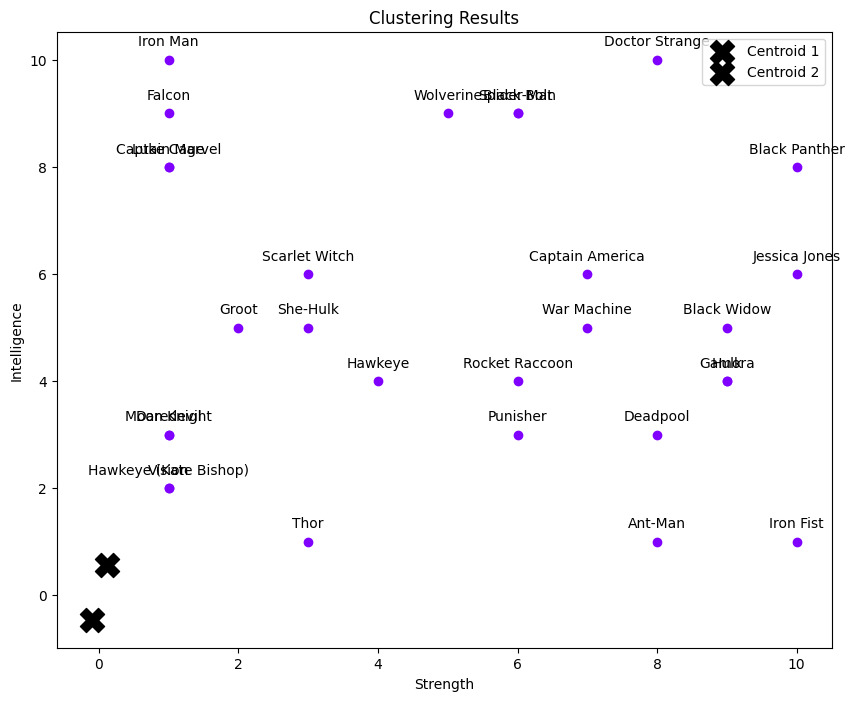

Team 1: Thor, Black Widow, Hawkeye, Scarlet Witch, Vision, Ant-Man, Captain Marvel, Daredevil, Luke Cage, Jessica Jones, Iron Fist, Punisher, Moon Knight, She-Hulk, Rocket Raccoon, Gamora
Team 2: Iron Man, Captain America, Hulk, Spider-Man, Black Panther, Doctor Strange, Falcon, War Machine, Wolverine, Deadpool, Hawkeye (Kate Bishop), Black Bolt, Groot


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Define the features you want to use for clustering
features = ["Strength", "Intelligence", "CombatSkills", "TechnologyUsage"]

# Load your dataset (make sure it contains the 'Character' column and the selected features)
avengers_df = pd.read_csv('avengers_large_dataset.csv')

# Extract the features for clustering
X = avengers_df[features].values

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose the number of clusters (teams)
n_clusters = 2

# Perform K-means clustering
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Add the 'Team' column to the dataset indicating cluster assignments
avengers_df['Team'] = labels

# Create a scatter plot and label each point with the character name
plt.figure(figsize=(10, 8))

# Label each point with the character name
for i, character in enumerate(avengers_df['Character']):
    plt.scatter(X[i, 0], X[i, 1], c=labels[i], cmap='rainbow')
    plt.annotate(character, (X[i, 0], X[i, 1]), textcoords="offset points", xytext=(0, 10), ha='center')

# Add centroids with labels for the legend
centroids = kmeans.cluster_centers_
for i, centroid in enumerate(centroids):
    plt.scatter(centroid[0], centroid[1], s=300, c='black', marker='X', label=f'Centroid {i + 1}')

plt.title('Clustering Results')
plt.xlabel('Strength')
plt.ylabel('Intelligence')
plt.legend()
plt.show()

# Print the character assignments to teams
teams = {}
for i in range(n_clusters):
    team_members = avengers_df[avengers_df['Team'] == i]['Character']
    teams[f"Team {i + 1}"] = team_members.tolist()

for team, members in teams.items():
    print(f"{team}: {', '.join(members)}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


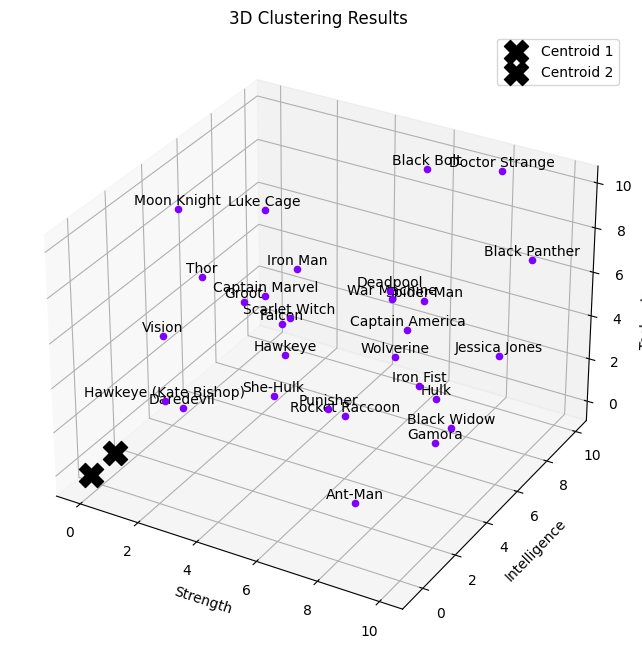

Team 1: Iron Man, Captain America, Hulk, Spider-Man, Black Panther, Doctor Strange, Falcon, War Machine, Wolverine, Deadpool, Hawkeye (Kate Bishop), Black Bolt, Groot
Team 2: Thor, Black Widow, Hawkeye, Scarlet Witch, Vision, Ant-Man, Captain Marvel, Daredevil, Luke Cage, Jessica Jones, Iron Fist, Punisher, Moon Knight, She-Hulk, Rocket Raccoon, Gamora


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import the 3D plotting module

# Define the features you want to use for clustering
features = ["Strength", "Intelligence", "CombatSkills", "TechnologyUsage"]

# Load your dataset (make sure it contains the 'Character' column and the selected features)
avengers_df = pd.read_csv('avengers_large_dataset.csv')

# Extract the features for clustering
X = avengers_df[features].values

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose the number of clusters (teams)
n_clusters = 2

# Perform K-means clustering
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Add the 'Team' column to the dataset indicating cluster assignments
avengers_df['Team'] = labels

# Create a 3D scatter plot with the z-axis for cluster assignments
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')  # Create a 3D subplot

# Label each point with the character name
for i, character in enumerate(avengers_df['Character']):
    ax.scatter(X[i, 0], X[i, 1], X[i, 2], c=labels[i], cmap='rainbow')
    ax.text(X[i, 0], X[i, 1], X[i, 2] + 0.2, character, ha='center')

# Add centroids with labels for the legend
centroids = kmeans.cluster_centers_
for i, centroid in enumerate(centroids):
    ax.scatter(centroid[0], centroid[1], centroid[2], s=300, c='black', marker='X', label=f'Centroid {i + 1}')

ax.set_title('3D Clustering Results')
ax.set_xlabel('Strength')
ax.set_ylabel('Intelligence')
ax.set_zlabel('TechnologyUsage')
ax.legend()

plt.show()

# Print the character assignments to teams
teams = {}
for i in range(n_clusters):
    team_members = avengers_df[avengers_df['Team'] == i]['Character']
    teams[f"Team {i + 1}"] = team_members.tolist()

for team, members in teams.items():
    print(f"{team}: {', '.join(members)}")


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.express as px

# Define the features you want to use for clustering
features = ["Strength", "Intelligence", "CombatSkills", "TechnologyUsage"]

# Load your dataset (make sure it contains the 'Character' column and the selected features)
avengers_df = pd.read_csv('avengers_large_dataset.csv')

# Extract the features for clustering
X = avengers_df[features].values

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose the number of clusters (teams)
n_clusters = 2

# Perform K-means clustering
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Add the 'Team' column to the dataset indicating cluster assignments
avengers_df['Team'] = labels

# Create a 3D scatter plot with Plotly
fig = px.scatter_3d(avengers_df, x='Strength', y='Intelligence', z='CombatSkills', color='Team',
                     hover_name='Character', symbol='Team', opacity=0.7, title='3D Clustering Results')

# Customize the layout
fig.update_layout(scene=dict(xaxis_title='Strength', yaxis_title='Intelligence', zaxis_title='CombatSkills'))

# Show the plot
fig.show()

# Print the character assignments to teams
teams = {}
for i in range(n_clusters):
    team_members = avengers_df[avengers_df['Team'] == i]['Character']
    teams[f"Team {i + 1}"] = team_members.tolist()

for team, members in teams.items():
    print(f"{team}: {', '.join(members)}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Team 1: Iron Man, Captain America, Hulk, Spider-Man, Black Panther, Doctor Strange, Falcon, War Machine, Wolverine, Deadpool, Black Bolt
Team 2: Thor, Black Widow, Hawkeye, Scarlet Witch, Vision, Ant-Man, Captain Marvel, Hawkeye (Kate Bishop), Daredevil, Luke Cage, Jessica Jones, Iron Fist, Punisher, Moon Knight, She-Hulk, Groot, Rocket Raccoon, Gamora


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.express as px

# Define the features you want to use for clustering
features = ["Strength", "Intelligence", "CombatSkills", "TechnologyUsage"]

# Load your dataset (make sure it contains the 'Character' column and the selected features)
avengers_df = pd.read_csv('avengers_large_dataset.csv')

# Extract the features for clustering
X = avengers_df[features].values

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose the number of clusters (teams)
n_clusters = 2

# Perform K-means clustering
kmeans = KMeans(n_clusters=n_clusters, n_init=10)  # Specify n_init to suppress the warning
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Add the 'Team' column to the dataset indicating cluster assignments
avengers_df['Team'] = labels

# Create a 3D scatter plot with Plotly
fig = px.scatter_3d(avengers_df, x='Strength', y='Intelligence', z='CombatSkills', color='Team',
                     hover_name='Character', symbol='Team', opacity=0.7, title='3D Clustering Results')

# Add labels to data points using annotations
for i, row in avengers_df.iterrows():
    fig.add_annotation(
        x=row['Strength'],
        y=row['Intelligence'],
        text=row['Character'],
        showarrow=False,
        font=dict(size=10),
        xshift=10,  # Adjust the x-shift for better label positioning
        yshift=10,  # Adjust the y-shift for better label positioning
        opacity=0.7,
    )

# Customize the layout
fig.update_layout(scene=dict(xaxis_title='Strength', yaxis_title='Intelligence', zaxis_title='CombatSkills'))

# Show the plot
fig.show()

# Print the character assignments to teams
teams = {}
for i in range(n_clusters):
    team_members = avengers_df[avengers_df['Team'] == i]['Character']
    teams[f"Team {i + 1}"] = team_members.tolist()

for team, members in teams.items():
    print(f"{team}: {', '.join(members)}")


Team 1: Thor, Black Widow, Hawkeye, Scarlet Witch, Vision, Ant-Man, Captain Marvel, Hawkeye (Kate Bishop), Daredevil, Luke Cage, Jessica Jones, Iron Fist, Punisher, Moon Knight, She-Hulk, Groot, Rocket Raccoon, Gamora
Team 2: Iron Man, Captain America, Hulk, Spider-Man, Black Panther, Doctor Strange, Falcon, War Machine, Wolverine, Deadpool, Black Bolt


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


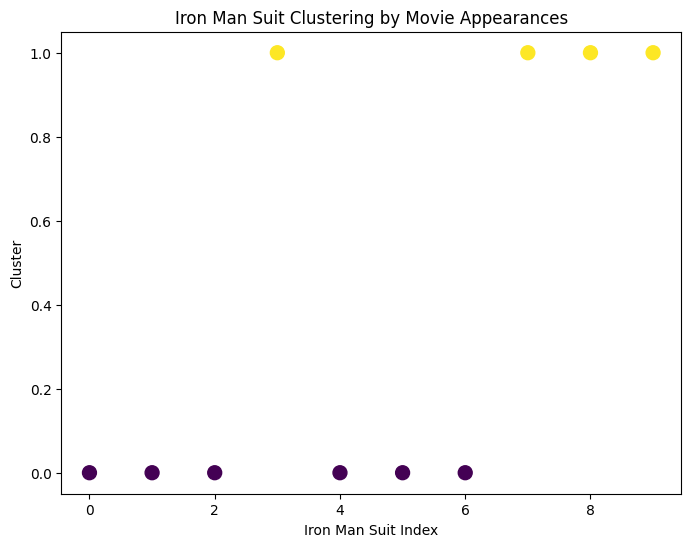

    SuitName  Cluster
0     Mark I        0
1    Mark II        0
2   Mark III        0
3    Mark IV        1
4     Mark V        0
5    Mark VI        0
6   Mark VII        0
7  Mark VIII        1
8    Mark IX        1
9     Mark X        1


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Create a hypothetical dataset of Iron Man suits and their appearances in movies
data = {
    'SuitName': [
        'Mark I', 'Mark II', 'Mark III', 'Mark IV', 'Mark V',
        'Mark VI', 'Mark VII', 'Mark VIII', 'Mark IX', 'Mark X'
    ],
    'IronMan': [
        1, 1, 1, 0, 0, 1, 0, 1, 1, 0
    ],
    'IronMan2': [
        0, 1, 0, 1, 0, 0, 0, 0, 0, 0
    ],
    'IronMan3': [
        1, 0, 1, 0, 1, 1, 1, 0, 0, 0
    ],
    'Avengers': [
        0, 0, 0, 1, 0, 1, 0, 1, 1, 1
    ],
    'AgeOfUltron': [
        0, 0, 0, 0, 0, 0, 0, 1, 1, 1
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Select the features for clustering (indicating appearances in movies)
features = df[['IronMan', 'IronMan2', 'IronMan3', 'Avengers', 'AgeOfUltron']]

# Choose the number of clusters (K = 2 for simplicity)
k = 2

# Apply K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=0)
df['Cluster'] = kmeans.fit_predict(features)

# Visualize the clustering results
plt.figure(figsize=(8, 6))
plt.scatter(df.index, df['Cluster'], c=df['Cluster'], cmap='viridis', s=100)
plt.xlabel('Iron Man Suit Index')
plt.ylabel('Cluster')
plt.title('Iron Man Suit Clustering by Movie Appearances')
plt.show()

# Print the clustering results
print(df[['SuitName', 'Cluster']])


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.express as px

# Define the features you want to use for clustering
features = ["Strength", "Intelligence", "CombatSkills", "TechnologyUsage"]

# Load your dataset (make sure it contains the 'Character' column and the selected features)
avengers_df = pd.read_csv('avengers_large_dataset.csv')

# Extract the features for clustering
X = avengers_df[features].values

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose the number of clusters (teams)
n_clusters = 2  # Increase the number of clusters for more distinct groups

# Perform K-means clustering
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)  # Specify random_state for reproducibility
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Add the 'Team' column to the dataset indicating cluster assignments
avengers_df['Team'] = labels

# Create a 3D scatter plot with Plotly
fig = px.scatter_3d(avengers_df, x='Strength', y='Intelligence', z='CombatSkills', color='Team',
                     hover_name='Character', symbol='Team', opacity=0.7, title='3D Clustering Results')

# Add labels to data points using annotations
for i, row in avengers_df.iterrows():
    fig.add_annotation(
        x=row['Strength'],
        y=row['Intelligence'],
        text=row['Character'],
        showarrow=False,
        font=dict(size=10),
        xshift=10,  # Adjust the x-shift for better label positioning
        yshift=10,  # Adjust the y-shift for better label positioning
        opacity=0.7,
    )

# Customize the layout
fig.update_layout(scene=dict(xaxis_title='Strength', yaxis_title='Intelligence', zaxis_title='CombatSkills'))

# Show the plot
fig.show()

# Print the character assignments to teams
teams = {}
for i in range(n_clusters):
    team_members = avengers_df[avengers_df['Team'] == i]['Character']
    teams[f"Team {i + 1}"] = team_members.tolist()

for team, members in teams.items():
    print(f"{team}: {', '.join(members)}")


Team 1: Thor, Hawkeye, Scarlet Witch, Spider-Man, Black Panther, Doctor Strange, Ant-Man, Captain Marvel, Falcon, War Machine, Wolverine, Daredevil, Black Bolt, Luke Cage, She-Hulk, Rocket Raccoon, Gamora
Team 2: Iron Man, Captain America, Black Widow, Hulk, Vision, Deadpool, Hawkeye (Kate Bishop), Jessica Jones, Iron Fist, Punisher, Moon Knight, Groot
